### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/coupons.csv')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

#Data shows that the 'car' column has only 108 rows with non null values so this needs to be addressed
#The following columns have a few null values - Bar, CoffeeHouse,CarryAway,RestuarantLessThan20 and Restaurant20to50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [33]:
# Fill all null values in 'car' field to 'Car'
data['car'].fillna("Car" , inplace = True)

#Drop the remaining rows where there are null values for any field to get a clean data set
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



In [6]:
#Identify the count of all rows where 'Y' == 1 (Coupon Accepted) and divide by the total count of rows
percent_accepted = (data.loc[data['Y'] == 1]['Y'].count() / (data['Y'].count())) * 100
print(percent_accepted)

56.93352098683666


5. Use a bar plot to visualize the `coupon` column.

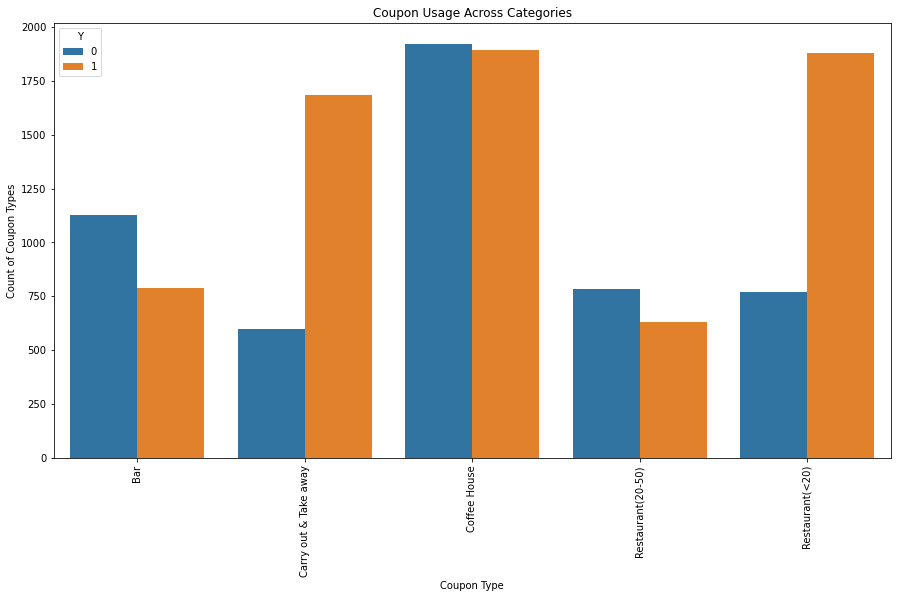

In [7]:
# Plotting a bar plot to show the total number of coupon types, both accepted and not accepted
#First, group the data by coupon type and acceptance and aggregate the counts of accepted/not accepted
testdata = data.groupby(['coupon', 'Y']).agg({'Y': ['count']})

#Next, rename the aggregated column to 'count' and reset the index
testdata.columns = ['count']
testdata = testdata.reset_index()

#Use Seaborn plot to visualize the coupon column
plt.figure(figsize=(15,8))
sns.barplot(data=testdata, x="coupon", y = 'count', hue = 'Y')
plt.xlabel("Coupon Type")
plt.ylabel("Count of Coupon Types")
plt.title("Coupon Usage Across Categories")
plt.xticks(rotation=90)
plt.savefig('images/couponUsage.png')
plt.show()

6. Use a histogram to visualize the temperature column.

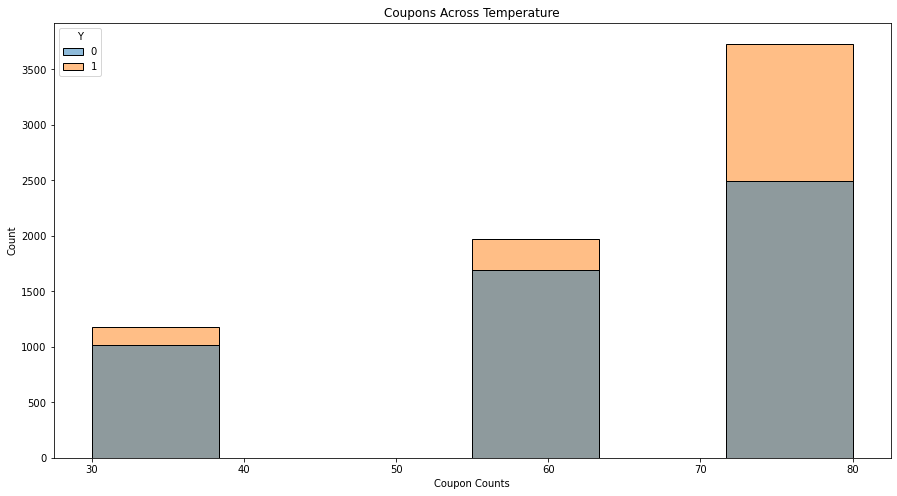

In [8]:
#Simple histogram of the data showing coupon
plt.figure(figsize=(15,8))
sns.histplot(data=data, x="temperature", hue = 'Y', bins=6)
plt.title("Coupons Across Temperature")
plt.xlabel("Temperature")
plt.xlabel("Coupon Counts")
plt.savefig('images/temperatureChart.png')
plt.show()


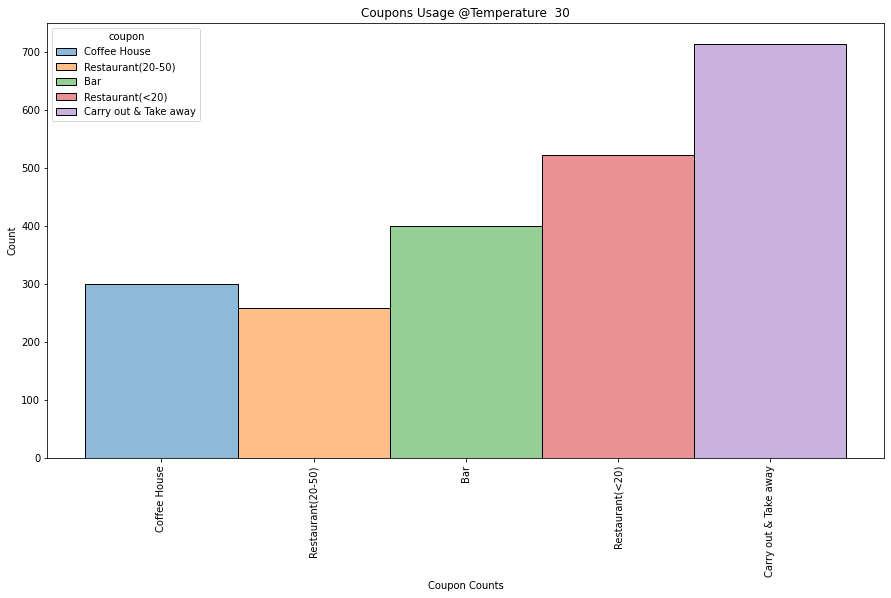

In [11]:
#Query the data for temperature==30F
data_30temp = data.query('temperature == 30')
plt.figure(figsize=(15,8))
sns.histplot(data=data_30temp, x="coupon", bins=6, hue = 'coupon')
plt.xticks(rotation=90)
plt.title("Coupons Usage @Temperature  30")
plt.xlabel("Coupon Type")
plt.xlabel("Coupon Counts")
plt.savefig('images/couponsat30F.png')
plt.show()

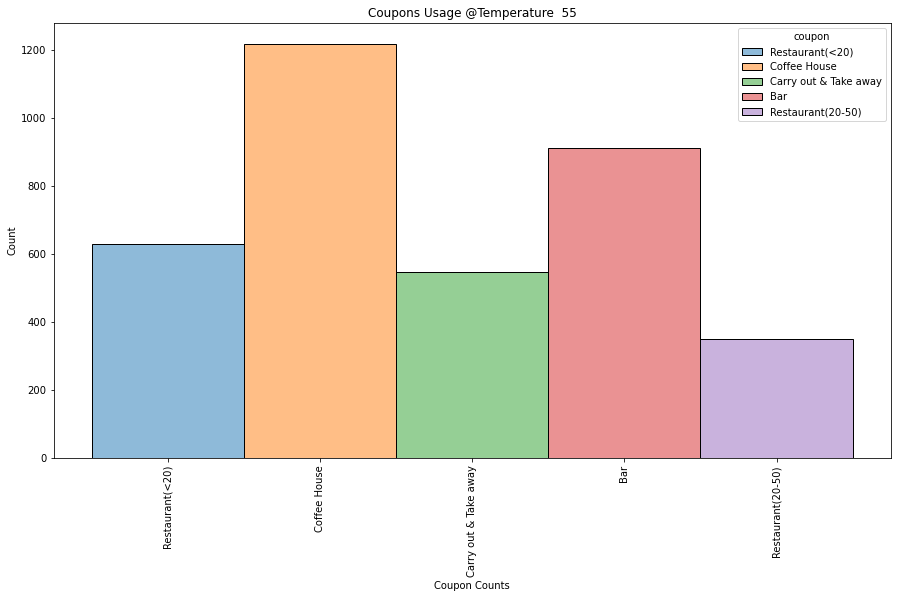

In [10]:
#Query data for temperature at 55F
data_55temp = data.query('temperature == 55')
plt.figure(figsize=(15,8))
sns.histplot(data=data_55temp, x="coupon", bins=6, hue = 'coupon')
plt.title("Coupons Usage @Temperature  55")
plt.xlabel("Coupon Type")
plt.xlabel("Coupon Counts")
plt.xticks(rotation=90)
plt.savefig('images/couponsat55F.png')
plt.show()

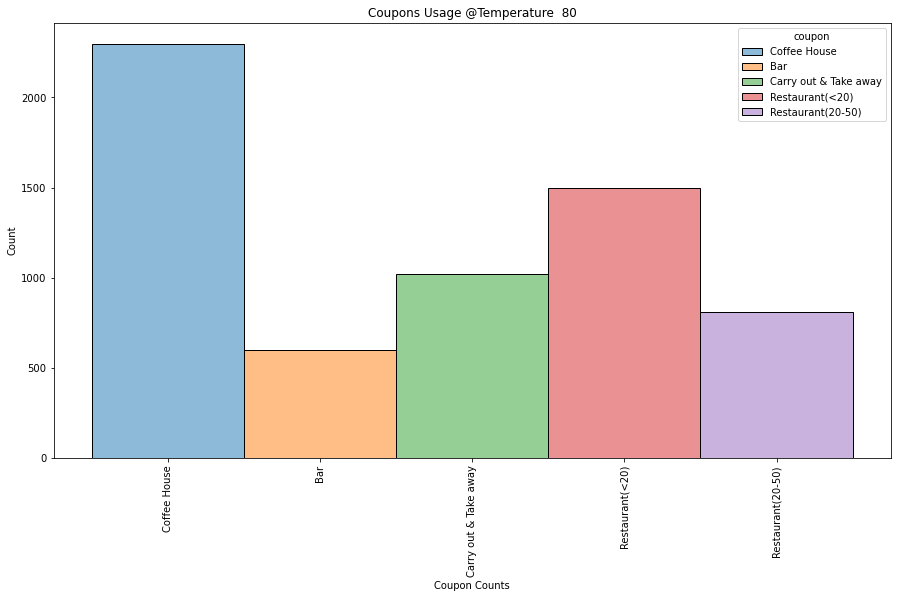

In [12]:
#Query data for temperature at 80F
data_80temp = data.query('temperature == 80')
plt.figure(figsize=(15,8))

sns.histplot(data=data_80temp, x="coupon", bins=6, hue = 'coupon')
plt.title("Coupons Usage @Temperature  80")
plt.xlabel("Coupon Type")
plt.xlabel("Coupon Counts")
plt.xticks(rotation=90)
plt.savefig('images/couponsat80F.png')
plt.show()

In [26]:
#Finding unique values for some of the fields.
bar_values = data['Bar'].unique()
print('Bar Values:', bar_values)

destination_values = data['destination'].unique()
print('Destination Values:', destination_values)

passanger_values = data['passanger'].unique()
print('Passanger Values:',passanger_values)

coupon_values = data['coupon'].unique()
print('Coupon Values:',coupon_values)

temp_values = data['temperature'].unique()
print('Temperature Values:', temp_values)

temp_values = data['toCoupon_GEQ5min'].unique()
print('toCoupon_GEQ5min Values:', temp_values)

temp_values = data['toCoupon_GEQ15min'].unique()
print('toCoupon_GEQ15min Values:', temp_values)

temp_values = data['RestaurantLessThan20'].unique()
print('RestaurantLessThan20 Values:', temp_values)

temp_values = data['occupation'].unique()
print('Occupation Values:', temp_values)

temp_values = data['age'].unique()
print('Age Values:', temp_values)

temp_values = data['maritalStatus'].unique()
print('MaritalStatus Values:', temp_values)

temp_values = data['income'].unique()
print('Income Values:', temp_values)

temp_values = data['RestaurantLessThan20'].unique()
print('RestaurantLessThan20 Values:', temp_values)


Bar Values: ['never' 'less1' '1~3' 'gt8' '4~8']
Destination Values: ['No Urgent Place' 'Home' 'Work']
Passanger Values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
Coupon Values: ['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']
Temperature Values: [55 80 30]
toCoupon_GEQ5min Values: [1]
toCoupon_GEQ15min Values: [0 1]
RestaurantLessThan20 Values: ['4~8' '1~3' 'less1' 'gt8' 'never']
Occupation Values: ['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Personal Care & Service' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Community & Social Services' 'Installation Maintenance & Repair'
 'Transportation & Material Moving' 'Business & Financial'
 'Protective Service' 'Food Preparation & Serving Re

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
bardata = data.query("coupon =='Bar'")
bardata.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


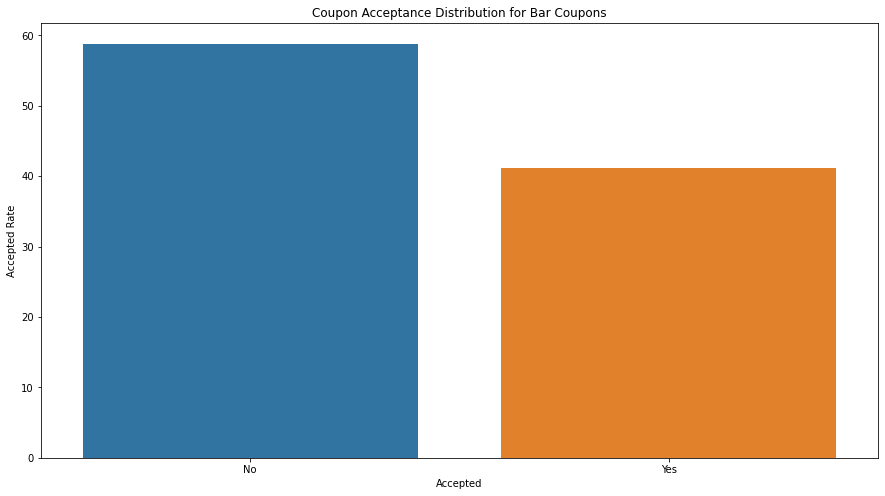

In [28]:
#Identify the count of all rows where 'Y' == 1 (Coupon Accepted) and divide by the total count of rows
percentbar_accepted = (bardata.loc[bardata['Y'] == 1]['Y'].count() / (bardata['Y'].count())) * 100
percentbar_notaccepted = 100-percentbar_accepted

#Group the data by Y - Accepted(1)/Not Accepted(0)
barplotdata = bardata.groupby(['Y']).agg({'Y': ['count']})
barplotdata.columns = ['count']
barplotdata = barplotdata.reset_index()

#Insert two new colums - accepted % & an accepted column that converts the 0/1 to No/Yes 
barplotdata.insert(2, "accepted %", [percentbar_notaccepted, percentbar_accepted], True)
barplotdata.insert(2, "accepted", ['No', 'Yes'], True)

# Plotting a bar plot to show the coupon accepted distribution for the bar coupons
plt.figure(figsize=(15,8))
sns.barplot(data=barplotdata, x="accepted", y='accepted %')
plt.xlabel("Accepted")
plt.ylabel("Accepted Rate")
plt.title("Coupon Acceptance Distribution for Bar Coupons")
plt.savefig('images/barCouponAcceptance.png')
plt.show()



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


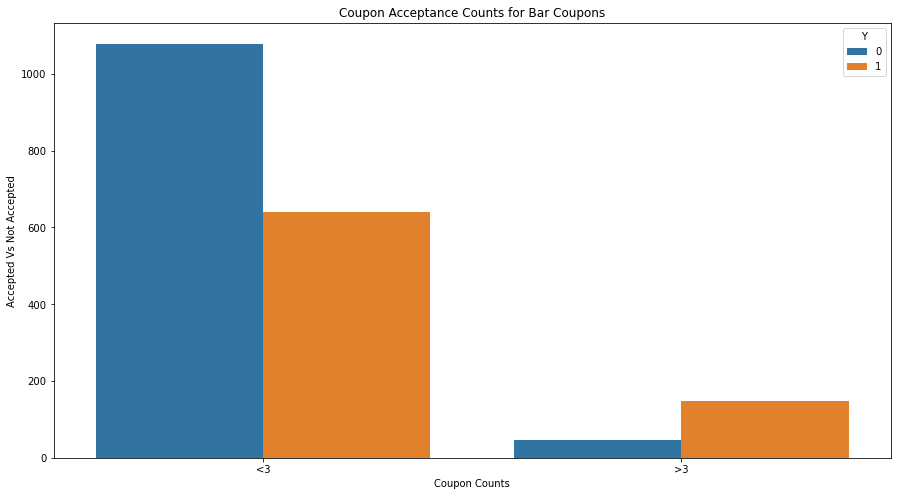

In [16]:
#The DataFrame contains just the bar coupons.
barvisitdata = bardata

#Replace the values of Bar to '<3' or '>3' based on values in the 'Bar' column
barvisitdata.loc[barvisitdata['Bar'] == '1~3', 'Bar'] = '<3'
barvisitdata.loc[barvisitdata['Bar'] == 'less1', 'Bar'] = '<3'
barvisitdata.loc[barvisitdata['Bar'] == 'never', 'Bar'] = '<3'
barvisitdata.loc[barvisitdata['Bar'] == '4~8', 'Bar'] = '>3'
barvisitdata.loc[barvisitdata['Bar'] == 'gt8', 'Bar'] = '>3'

#Group the data by Bar and Coupon acceptance for coupons only and then reset the index. 
barvisitdata = barvisitdata.groupby(['Bar', 'Y'])[['coupon']].count()
barvisitdata = barvisitdata.reset_index()

# Then plot a bar plot to show the acceptance rate between those who went to a bar 3 or fewer times a month 
# to those who went more
plt.figure(figsize=(15,8))
sns.barplot(data=barvisitdata, x="Bar", y='coupon', hue = 'Y')
plt.xlabel("Coupon Counts")
plt.ylabel("Accepted Vs Not Accepted")
plt.title("Coupon Acceptance Counts for Bar Coupons")
plt.savefig('images/barVisitChart.png')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
newbardata = data.query("coupon =='Bar'")
newbardata = newbardata[['Bar','age','Y']]
newbardata = newbardata.groupby(['Bar','age','Y'])['Y'].count()
newbardata = newbardata.reset_index(name='counts')

newbardata.loc[newbardata['age'] == '26', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '31', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '36', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '41', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '46', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '50plus', 'age'] = 'over25'
newbardata.loc[newbardata['age'] == '21', 'age'] = 'below21'

newbardata.loc[newbardata['Bar'] == '1~3', 'Bar'] = '>1'
newbardata.loc[newbardata['Bar'] == 'less1', 'Bar'] = '<1'
newbardata.loc[newbardata['Bar'] == 'never', 'Bar'] = '<1'
newbardata.loc[newbardata['Bar'] == '4~8', 'Bar'] = '>1'
newbardata.loc[newbardata['Bar'] == 'gt8', 'Bar'] = '>1'

newbardata = newbardata.groupby(['Bar','age','Y'])['counts'].sum()
newbardata = newbardata.reset_index(name='counts')

newbardata


,Bar,age,Y,counts
0,<1,below21,0,189
1,<1,below21,1,120
2,<1,over25,0,756
3,<1,over25,1,276
4,>1,below21,0,55
5,>1,below21,1,114
6,>1,over25,0,125
7,>1,over25,1,278


In [18]:
#It looks like the coupon acceptance rate for people who are over 25 and go to the bar more than once is 69% as compared to
#only 26% acceptance for the same people who go to the bar less than once. 
#For people who are below 21, the numbers are similar with 67% acceptance for people who go to the bar more than once as opposed 
#to 38% acceptance for people who go to the bar less than once. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
#Query for Bar data with occupation other than farming, fishing or Forestry and passanger who is not a kid. 
da = bardata.query("occupation != 'Farming Fishing & Forestry'")
db = da.query("passanger != 'Kid(s)'")

#Eliminate all rows where the driver goes to bar less than once a month
dc = db.query("Bar != 'less1'" or "Bar != 'never'")

dd = dc[['coupon','Y']]
dd = dd.groupby(['coupon','Y'])['Y'].count().reset_index(name='counts')

#Insert two new colums - accepted % & an accepted column that converts the 0/1 to No/Yes 
dd.insert(2, "type", ['Not_Farm_Fish_Forestry_kid', 'Not_Farm_Fish_Forestry_kid'], True)
dd.insert(2, "accepted", ['No', 'Yes'], True)

dd

,coupon,Y,accepted,type,counts
0,Bar,0,No,Not_Farm_Fish_Forestry_kid,968
1,Bar,1,Yes,Not_Farm_Fish_Forestry_kid,745


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [24]:
#go to bars more than once a month and are under the age of 30 
aa = bardata.query("age == '21'" or "age == 'below21'")

#Eliminate all rows where the driver goes to bar less than once a month
ac = aa.query("Bar != 'less1'" or "Bar != 'never'")

ad = ac[['coupon','Y']]
ad = ad.groupby(['coupon','Y'])['Y'].count().reset_index(name='counts')

ad

,coupon,Y,counts
0,Bar,0,197
1,Bar,1,200


In [23]:
#Go to bars more than once a month, had passengers that were not a kid, and were not widowed
a1 = bardata.query("maritalStatus != 'Widowed'")
a2 = a1.query("passanger != 'Kid(s)'")

#Eliminate all rows where the driver goes to bar less than once a month
a3 = a2.query("Bar != 'less1'" or "Bar != 'never'")

a4 = a3[['coupon','Y']]
a5 = a4.groupby(['coupon','Y'])['Y'].count().reset_index(name='counts')

#Insert two new colums - accepted % & an accepted column that converts the 0/1 to No/Yes 
a5.insert(2, "type", ['Not_Widowed', 'Not_Widowed'], True)
a5.insert(2, "accepted", ['No', 'Yes'], True)

a5

,coupon,Y,accepted,type,counts
0,Bar,0,No,Not_Widowed,961
1,Bar,1,Yes,Not_Widowed,741


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [27]:
#- go to cheap restaurants more than 4 times a month and income is less than 50K.

b1 = bardata.query("income == '$12500 - $24999'" or "income == '$37500 - $49999'" or "income == '$25000 - $37499'" or "income =='Less than $12500'")

#query for only rows where the driver goes to cheap restaurants more than 4 times a month
b2 = b1.query("RestaurantLessThan20 == '4~8'" or "RestaurantLessThan20 == 'gt8'")

b2 = b2[['coupon','Y']]
b3 = b2.groupby(['coupon','Y'])['Y'].count().reset_index(name='counts')

b3

,coupon,Y,counts
0,Bar,0,42
1,Bar,1,30


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

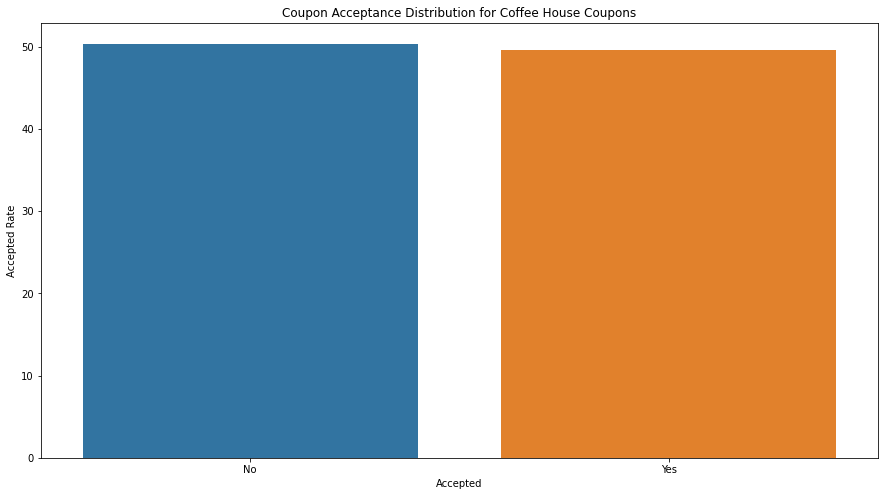

In [30]:
coffeeHouseData = data.query("coupon == 'Coffee House'")
#Identify the count of all rows where 'Y' == 1 (Coupon Accepted) and divide by the total count of rows
percentCoffee_accepted = (coffeeHouseData.loc[coffeeHouseData['Y'] == 1]['Y'].count() / (coffeeHouseData['Y'].count())) * 100
percentCoffee_notaccepted = 100-percentCoffee_accepted

#Group the data by Y - Accepted(1)/Not Accepted(0)
coffeeplotdata = coffeeHouseData.groupby(['Y']).agg({'Y': ['count']})
coffeeplotdata.columns = ['count']
coffeeplotdata = coffeeplotdata.reset_index()

#Insert two new colums - accepted % & an accepted column that converts the 0/1 to No/Yes 
coffeeplotdata.insert(2, "accepted %", [percentCoffee_notaccepted, percentCoffee_accepted], True)
coffeeplotdata.insert(2, "accepted", ['No', 'Yes'], True)

# Plotting a bar plot to show the coupon accepted distribution for the bar coupons
plt.figure(figsize=(15,8))
sns.barplot(data=coffeeplotdata, x="accepted", y='accepted %')
plt.xlabel("Accepted")
plt.ylabel("Accepted Rate")
plt.title("Coupon Acceptance Distribution for Coffee House Coupons")
plt.savefig('images/coffeeCouponAcceptance.png')
plt.show()

